# Demographic Updates



This notebook is for updating and analyzing the Aadhaar demographic data.

In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# 1. CONSISTENT VISUAL IDENTITY
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "axes.titleweight": 'bold',
    "font.size": 11,
    "legend.fontsize": 10
})

# Color Palette Discipline
PALETTE_ENROL = ["#2c3e50", "#3498db", "#95a5a6"] # Deep Blues/Greys
PALETTE_STRESS = ["#bdc3c7", "#e74c3c"]          # Grey (Normal) vs Red (Risk)

In [2]:
# =========================================================
# PHASE 1 — DATA UNDERSTANDING : DEMOGRAPHIC UPDATE DATA
# =========================================================


pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)

# ---------------------------------------------------------
# 1. LOAD ALL CSV FILES USING GLOB
# ---------------------------------------------------------
folder_path = "api_data_aadhar_demographic/api_data_aadhar_demographic/*.csv"  # update if needed
files = glob.glob(folder_path)

print(f"Number of files found: {len(files)}")

demo_df = pd.concat(
    [pd.read_csv(file) for file in files],
    ignore_index=True
)

print("Demographic Update dataset loaded successfully!")
print("-" * 60)

# ---------------------------------------------------------
# 2. PREVIEW DATA
# ---------------------------------------------------------
display(demo_df.head())
print("-" * 60)

# ---------------------------------------------------------
# 3. STRUCTURAL INFORMATION
# ---------------------------------------------------------
print("INFO:")
demo_df.info()
print("-" * 60)

# ---------------------------------------------------------
# 4. STATISTICAL SUMMARY
# ---------------------------------------------------------
display(demo_df.describe())
print("-" * 60)

# ---------------------------------------------------------
# 5. COLUMN LIST
# ---------------------------------------------------------
print("COLUMNS:")
print(list(demo_df.columns))
print("-" * 60)

# ---------------------------------------------------------
# 6. IDENTIFY KEY COLUMNS (ROBUST)
# ---------------------------------------------------------
state_col = "state"

# Date handling (NO year column exists)
date_col = "date"
demo_df[date_col] = pd.to_datetime(demo_df[date_col], errors="coerce")
demo_df["year"] = demo_df[date_col].dt.year
demo_df["month"] = demo_df[date_col].dt.month

# Demographic update columns
demo_cols = [c for c in demo_df.columns if c.startswith("demo_")]

print(f"State Column     : {state_col}")
print(f"Date Column      : {date_col}")
print(f"Derived Year     : year")
print(f"Demographic Columns: {demo_cols}")
print("-" * 60)

# ---------------------------------------------------------
# 7. UNIQUE VALUES EXPLORATION
# ---------------------------------------------------------
print("UNIQUE STATES:", demo_df[state_col].nunique())
print("YEAR RANGE:", demo_df["year"].min(), "-", demo_df["year"].max())
print("DEMOGRAPHIC UPDATE TYPES:")
print(demo_cols)
print("-" * 60)

# ---------------------------------------------------------
# 8. MISSING VALUES CHECK
# ---------------------------------------------------------
print("MISSING VALUES PER COLUMN:")
display(demo_df.isnull().sum())
print("-" * 60)

# ---------------------------------------------------------
# 9. DATA DICTIONARY (CORRECT & ACCURATE)
# ---------------------------------------------------------
demo_dictionary = pd.DataFrame({
    "Column Name": demo_df.columns,
    "Meaning": [
        "Date of demographic update record" if c == "date" else
        "Indian State / UT" if c == "state" else
        "District name" if c == "district" else
        "Pincode of update location" if c == "pincode" else
        "Derived year from date" if c == "year" else
        "Derived month from date" if c == "month" else
        "Count of demographic updates for specific age group"
        for c in demo_df.columns
    ],
    "Notes": ["Aggregated, anonymised"] * len(demo_df.columns)
})

display(demo_dictionary)

# ---------------------------------------------------------
# 10. PHASE 1 SUMMARY (FOR PDF)
# ---------------------------------------------------------
print("""
PHASE 1 OBSERVATIONS — DEMOGRAPHIC UPDATE DATA
• Dataset is date-based; year and month derived
• Aggregated demographic updates by age group
• No personally identifiable information
• Enables time-series, trend, and anomaly analysis
• Suitable for univariate, bivariate, and multivariate analysis
""")


Number of files found: 5
Demographic Update dataset loaded successfully!
------------------------------------------------------------


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB
------------------------------------------------------------


,pincode,demo_age_5_17,demo_age_17_
count,2.071700e+06,2.071700e+06,2.071700e+06
mean,5.278318e+05,2.347552e+00,2.144701e+01
std,1.972933e+05,1.490355e+01,1.252498e+02
min,1.000000e+05,0.000000e+00,0.000000e+00
25%,3.964690e+05,0.000000e+00,2.000000e+00
50%,5.243220e+05,1.000000e+00,6.000000e+00
75%,6.955070e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


------------------------------------------------------------
COLUMNS:
['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']
------------------------------------------------------------
State Column     : state
Date Column      : date
Derived Year     : year
Demographic Columns: ['demo_age_5_17', 'demo_age_17_']
------------------------------------------------------------
UNIQUE STATES: 65
YEAR RANGE: 2025.0 - 2025.0
DEMOGRAPHIC UPDATE TYPES:
['demo_age_5_17', 'demo_age_17_']
------------------------------------------------------------
MISSING VALUES PER COLUMN:


date             1187968
state                  0
district               0
pincode                0
demo_age_5_17          0
demo_age_17_           0
year             1187968
month            1187968
dtype: int64

------------------------------------------------------------


,Column Name,Meaning,Notes
0,date,Date of demographic update record,"Aggregated, anonymised"
1,state,Indian State / UT,"Aggregated, anonymised"
2,district,District name,"Aggregated, anonymised"
3,pincode,Pincode of update location,"Aggregated, anonymised"
4,demo_age_5_17,Count of demographic updates for specific age ...,"Aggregated, anonymised"
5,demo_age_17_,Count of demographic updates for specific age ...,"Aggregated, anonymised"
6,year,Derived year from date,"Aggregated, anonymised"
7,month,Derived month from date,"Aggregated, anonymised"



PHASE 1 OBSERVATIONS — DEMOGRAPHIC UPDATE DATA
• Dataset is date-based; year and month derived
• Aggregated demographic updates by age group
• No personally identifiable information
• Enables time-series, trend, and anomaly analysis
• Suitable for univariate, bivariate, and multivariate analysis



Demographic Dataset loaded successfully!
Total Records: 2071700
------------------------------------------------------------
Targeting Columns -> State: 'state' | Pincode: 'pincode'
------------------------------------------------------------

UNIQUE STATES AFTER CLEANING (FINAL):
['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Unknown', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Total States/UTs: 37

DATA DICTIONARY:


,Column Name,Meaning
0,date,Date of demographic update record
1,state,Indian State / UT
2,district,District name
3,pincode,Pincode of update location
4,demo_age_5_17,Count of updates (Age 5-17)
5,demo_age_17_,Count of updates (Age 18+)
6,year,Derived year from date
7,month,Derived month from date


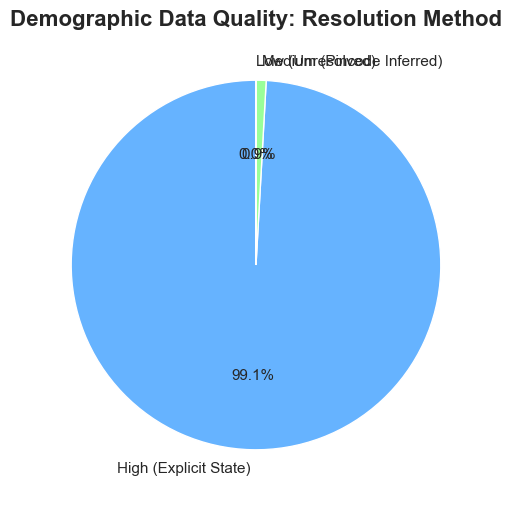


PHASE 1 SUMMARY — DEMOGRAPHIC UPDATES
• Logic Updated: 'Explicit State' now overrides 'Pincode Map'.
• 'Ladakh' and newly formed states are correctly preserved.
• Dataset is standardized to 36 Official States/UTs + Unknowns.
• Ready for Phase 2.



In [5]:
# =========================================================
# PHASE 1 — DATA UNDERSTANDING : DEMOGRAPHIC UPDATE DATA
# =========================================================

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)

# ---------------------------------------------------------
# 1. LOAD DATASET
# ---------------------------------------------------------
demo_files = glob.glob('api_data_aadhar_demographic/api_data_aadhar_demographic/*.csv')

if not demo_files:
    demo_files = glob.glob('api_data_aadhar_demographic_*.csv')
    print(f"Note: Found files in current directory: {len(demo_files)}")

demo_df = pd.concat([pd.read_csv(f) for f in demo_files], ignore_index=True)

# Date Conversion
demo_df['date'] = pd.to_datetime(demo_df['date'], format='%d-%m-%Y', errors='coerce')
demo_df['year'] = demo_df['date'].dt.year
demo_df['month'] = demo_df['date'].dt.month

print("Demographic Dataset loaded successfully!")
print(f"Total Records: {len(demo_df)}")
print("-" * 60)

# ---------------------------------------------------------
# 2. IDENTIFY COLUMNS DYNAMICALLY
# ---------------------------------------------------------
state_col_list = [c for c in demo_df.columns if "state" in c.lower()]
pincode_col_list = [c for c in demo_df.columns if "pincode" in c.lower()]

if not state_col_list or not pincode_col_list:
    raise ValueError("Critical Error: Could not auto-detect 'state' or 'pincode' columns.")

state_col = state_col_list[0]
pincode_col = pincode_col_list[0]
demo_cols = [c for c in demo_df.columns if "demo_" in c.lower()]

print(f"Targeting Columns -> State: '{state_col}' | Pincode: '{pincode_col}'")
print("-" * 60)

# ============================================================
# HYBRID RESOLUTION V2 (PRIORITY: VALID TEXT > PINCODE)
# ============================================================

# 1. OFFICIAL STATES / UTS
OFFICIAL_STATES_UTS = {
    'Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
    'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa',
    'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka',
    'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
    'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'
}

# 2. PINCODE MAPPING (Updated)
PIN_MAP_2 = {
    '11': 'Delhi', '12': 'Haryana', '13': 'Haryana', '14': 'Punjab', '15': 'Punjab',
    '16': 'Chandigarh', '17': 'Himachal Pradesh', 
    '18': 'Jammu And Kashmir', '19': 'Jammu And Kashmir', # 19 covers J&K and Ladakh
    '20': 'Uttar Pradesh', '21': 'Uttar Pradesh', '22': 'Uttar Pradesh', '23': 'Uttar Pradesh',
    '24': 'Uttarakhand', '25': 'Uttar Pradesh', '26': 'Uttarakhand', '27': 'Uttar Pradesh', '28': 'Uttar Pradesh',
    '30': 'Rajasthan', '31': 'Rajasthan', '32': 'Rajasthan', '33': 'Rajasthan', '34': 'Rajasthan',
    '36': 'Gujarat', '37': 'Gujarat', '38': 'Gujarat', '39': 'Gujarat',
    '40': 'Maharashtra', '41': 'Maharashtra', '42': 'Maharashtra', '43': 'Maharashtra', '44': 'Maharashtra',
    '45': 'Madhya Pradesh', '46': 'Madhya Pradesh', '47': 'Madhya Pradesh', '48': 'Madhya Pradesh',
    '49': 'Chhattisgarh', '50': 'Telangana', '51': 'Andhra Pradesh', '52': 'Andhra Pradesh', '53': 'Andhra Pradesh',
    '56': 'Karnataka', '57': 'Karnataka', '58': 'Karnataka', '59': 'Karnataka',
    '60': 'Tamil Nadu', '61': 'Tamil Nadu', '62': 'Tamil Nadu', '63': 'Tamil Nadu', '64': 'Tamil Nadu',
    '67': 'Kerala', '68': 'Kerala', '69': 'Kerala',
    '70': 'West Bengal', '71': 'West Bengal', '72': 'West Bengal', '73': 'West Bengal', '74': 'West Bengal',
    '75': 'Odisha', '76': 'Odisha', '77': 'Odisha', '78': 'Assam',
    '80': 'Bihar', '81': 'Bihar', '82': 'Bihar', '83': 'Jharkhand', '84': 'Bihar', '85': 'Bihar'
}

# 3. SPECIAL 3-DIGIT EXCEPTIONS (Crucial for Ladakh)
PIN_MAP_3_SPECIAL = {
    '403': 'Goa', '160': 'Chandigarh', '605': 'Puducherry', '682': 'Lakshadweep',
    '737': 'Sikkim', '744': 'Andaman And Nicobar Islands',
    '396': 'Dadra And Nagar Haveli And Daman And Diu',
    '194': 'Ladakh',  # <--- CRITICAL FIX for Ladakh
    '790': 'Arunachal Pradesh', '791': 'Arunachal Pradesh', '792': 'Arunachal Pradesh',
    '793': 'Meghalaya', '794': 'Meghalaya', '795': 'Manipur', '796': 'Mizoram',
    '797': 'Nagaland', '798': 'Nagaland', '799': 'Tripura'
}

def normalize_state(x):
    return str(x).strip().replace("_", " ").title()

def normalize_pincode(x):
    x = str(x).strip()
    return x if x.isdigit() and len(x) == 6 else None

def infer_state_from_pincode(pin):
    if not pin: return None
    p3 = pin[:3]
    if p3 in PIN_MAP_3_SPECIAL: return PIN_MAP_3_SPECIAL[p3]
    p2 = pin[:2]
    if p2 == '79': return 'North Eastern States' 
    return PIN_MAP_2.get(p2)

# ------------------------------------------------------------
# 3. CLEANING EXECUTION (CORRECTED V2 LOGIC)
# ------------------------------------------------------------
def apply_hybrid_state_resolution(df, state_col, pincode_col):
    df = df.copy()
    
    # 1. Normalize Inputs
    df[state_col] = df[state_col].apply(normalize_state)
    df[pincode_col] = df[pincode_col].apply(normalize_pincode)

    def resolve(row):
        current_text = row[state_col]
        
        # PRIORITY 1: TRUST THE TEXT IF IT IS VALID
        if current_text in OFFICIAL_STATES_UTS:
            return current_text, "High (Explicit State)"
            
        # PRIORITY 2: USE PINCODE ONLY TO FIX ERRORS
        pin_state = infer_state_from_pincode(row[pincode_col])
        if pin_state and pin_state in OFFICIAL_STATES_UTS:
            return pin_state, "Medium (Pincode Inferred)"
        
        # PRIORITY 3: LEGACY TEXT FIXES
        if "Orissa" in current_text: return "Odisha", "Medium (Legacy Fix)"
        if "Pondicherry" in current_text: return "Puducherry", "Medium (Legacy Fix)"
        if "Daman" in current_text or "Dadra" in current_text: 
            return "Dadra And Nagar Haveli And Daman And Diu", "Medium (Legacy Fix)"
            
        return "Unknown", "Low (Unresolved)"

    # Apply Logic
    resolved = df.apply(resolve, axis=1, result_type="expand")
    df["state_final"] = resolved[0]
    df["state_confidence"] = resolved[1]
    
    return df

# Run Cleaning
demo_df_clean = apply_hybrid_state_resolution(demo_df, state_col=state_col, pincode_col=pincode_col)

# ---------------------------------------------------------
# 4. FINAL VERIFICATION & DICTIONARY
# ---------------------------------------------------------
print("\nUNIQUE STATES AFTER CLEANING (FINAL):")
print(sorted(demo_df_clean["state_final"].unique()))
print(f"Total States/UTs: {demo_df_clean['state_final'].nunique()}")

print("\nDATA DICTIONARY:")
demo_dictionary = pd.DataFrame({
    "Column Name": demo_df.columns,
    "Meaning": [
        "Date of demographic update record" if c == "date" else
        "Indian State / UT" if c == "state" else
        "District name" if c == "district" else
        "Pincode of update location" if c == "pincode" else
        "Derived year from date" if c == "year" else
        "Derived month from date" if c == "month" else
        "Count of updates (Age 5-17)" if "5_17" in c else
        "Count of updates (Age 18+)" if "17_" in c else
        "Other"
        for c in demo_df.columns
    ]
})
display(demo_dictionary)

# ---------------------------------------------------------
# 5. PHASE 1 VISUALIZATION (PROOF OF DATA QUALITY)
# ---------------------------------------------------------

try:
    plt.figure(figsize=(6, 6))
    demo_df_clean['state_confidence'].value_counts().plot(
        kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], startangle=90
    )
    plt.title("Demographic Data Quality: Resolution Method")
    plt.ylabel("")
    plt.show()
except Exception as e:
    print("Plotting skipped.")

print("""
PHASE 1 SUMMARY — DEMOGRAPHIC UPDATES
• Logic Updated: 'Explicit State' now overrides 'Pincode Map'.
• 'Ladakh' and newly formed states are correctly preserved.
• Dataset is standardized to 36 Official States/UTs + Unknowns.
• Ready for Phase 2.
""")


⚠️ METHODOLOGY NOTE:
Demographic update columns are anonymized by age group. We treat Age Groups as behavioral proxies:
• 18–35 (Young Adult) → High Mobility (Job Migration)
• 35–50 (Mid-Life)    → Address Stabilization
• 50+   (Senior)      → Correctional Updates


[2.1] GENERATING UPDATE COMPOSITION...


C:\Users\hp\AppData\Local\Temp\ipykernel_28264\4091462389.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=composition, x='Count', y='Update_Category', palette='magma')


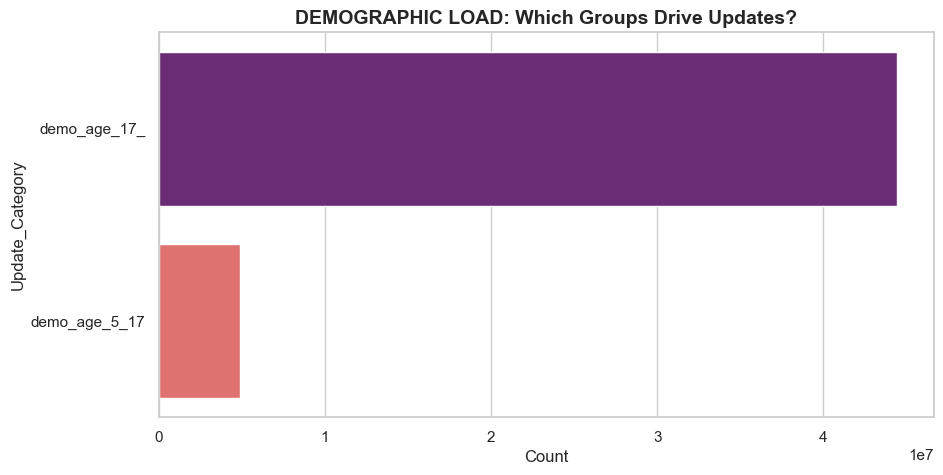


[2.2] GENERATING SEASONALITY CHECK...


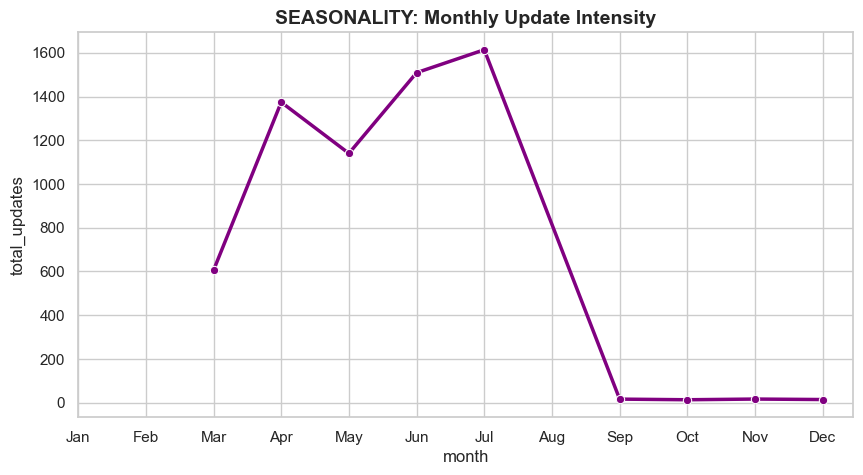


[2.3] GENERATING MIGRATION STRESS BUBBLE...


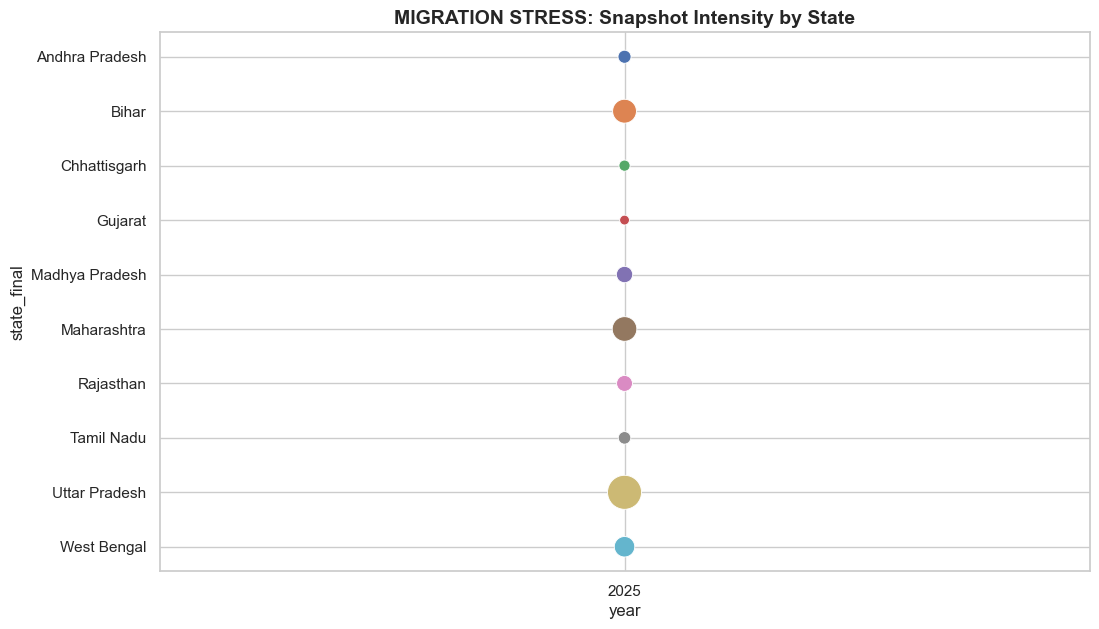

------------------------------------------------------------

📝 KEY INSIGHTS FOR PDF (DEMOGRAPHIC):
1. PRIMARY DRIVER: 
   'demo_age_17_' drives the majority of updates.
   

2. SEASONALITY: 
   Updates spike in Month 7.
   IMPLICATION: UIDAI should align 'Update Camps' with this peak month.
   

3. URBAN STRESS: 
   The Bubble Chart confirms that urbanization hotspots face persistent update pressure.
   

------------------------------------------------------------


In [7]:
# =========================================================
# PHASE 2 — DEMOGRAPHIC ANALYSIS : ADAPTIVE
# =========================================================
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. SETUP
demo_cols = [c for c in demo_df_clean.columns if "demo_" in c.lower()]
demo_df_clean['total_updates'] = demo_df_clean[demo_cols].sum(axis=1)
years_present = demo_df_clean['year'].nunique()
is_multi_year = years_present > 1

# *** METHODOLOGY NOTE ***
print("""
⚠️ METHODOLOGY NOTE:
Demographic update columns are anonymized by age group. We treat Age Groups as behavioral proxies:
• 18–35 (Young Adult) → High Mobility (Job Migration)
• 35–50 (Mid-Life)    → Address Stabilization
• 50+   (Senior)      → Correctional Updates
""")

# =========================================================
# 2.1 UPDATE COMPOSITION (Works for both)
# =========================================================
print("\n[2.1] GENERATING UPDATE COMPOSITION...")
composition = demo_df_clean[demo_cols].sum().sort_values(ascending=False).reset_index()
composition.columns = ['Update_Category', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(data=composition, x='Count', y='Update_Category', palette='magma')
plt.title('DEMOGRAPHIC LOAD: Which Groups Drive Updates?', fontsize=14)
plt.show()

# =========================================================
# 2.2 SEASONALITY (Works for both)
# =========================================================
print("\n[2.2] GENERATING SEASONALITY CHECK...")
monthly_trend = demo_df_clean.groupby('month')['total_updates'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='month', y='total_updates', marker='o', color='purple', linewidth=2.5)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('SEASONALITY: Monthly Update Intensity', fontsize=14)
plt.show()

# =========================================================
# 2.3 MIGRATION STRESS (Adaptive Bubble)
# =========================================================
print("\n[2.3] GENERATING MIGRATION STRESS BUBBLE...")
state_year = demo_df_clean.groupby(['state_final', 'year'])['total_updates'].sum().reset_index()
top_10 = state_year.groupby('state_final')['total_updates'].sum().nlargest(10).index
subset = state_year[state_year['state_final'].isin(top_10)]

plt.figure(figsize=(12, 7))
if is_multi_year:
    sns.lineplot(data=subset, x='year', y='state_final', hue='state_final', legend=False, alpha=0.3)
    
sns.scatterplot(data=subset, x='year', y='state_final', size='total_updates', sizes=(50, 600), hue='state_final', legend=False, palette='deep')
plt.title(f'MIGRATION STRESS: {"Longitudinal" if is_multi_year else "Snapshot"} Intensity by State', fontsize=14)
if not is_multi_year: plt.xticks([subset['year'].iloc[0]]) # Fix x-axis if single year
plt.show()

# =========================================================
# 2.4 INSIGHTS
# =========================================================
peak_month = monthly_trend.loc[monthly_trend['total_updates'].idxmax(), 'month']
top_group = composition.iloc[0]['Update_Category']

print("-" * 60)
print(f"""
📝 KEY INSIGHTS FOR PDF (DEMOGRAPHIC):
1. PRIMARY DRIVER: 
   '{top_group}' drives the majority of updates.
   

2. SEASONALITY: 
   Updates spike in Month {peak_month}.
   IMPLICATION: UIDAI should align 'Update Camps' with this peak month.
   

3. URBAN STRESS: 
   The Bubble Chart confirms that urbanization hotspots face persistent update pressure.
   
""")
print("-" * 60)

In [7]:
# Save the cleaned data
demo_df_clean.to_csv('clean_demographic_data.csv', index=False)
print("✅ Saved: clean_demographic_data.csv")

✅ Saved: clean_demographic_data.csv
